<a href="https://colab.research.google.com/github/kihyuk-nam/traindb-model/blob/main/rspn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python -V

Python 3.10.12


In [10]:
!pip3 install spflow sqlparse logging
# add 'torch' for local environment. no need for colab and codespaces
# 'pip' may create an error.
# 'sklearn' related errors can be resolved by executing 'pip3 install spflow==' and then try  again.
# cf. DeepDB  https://github.com/DataManagementLab/deepdb-public

In [1]:
# For training(train() method), networkx package should be 2.6.3.
# 2023.10.18: the spflow installs networkx 3.1, which creates an error
!pip3 install networkx==2.6.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.1 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [2]:
# connect to Gogole Drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# go to your working directory
!pwd
%cd /content/drive/MyDrive/ETRI/2023/RSPN
!ls

/content
/content/drive/MyDrive/ETRI/2023/RSPN
rspn.ipynb  traindb-model




---



In [ ]:
# if the traindb-model has not installed yet
!git clone https://github.com/kihyuk-nam/traindb-model.git



---



In [5]:
# if the traindb-model has been cloned
%cd /content/drive/MyDrive/ETRI/2023/RSPN/traindb-model/
!git pull

/content/drive/MyDrive/ETRI/2023/RSPN/traindb-model
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 47 (delta 30), reused 34 (delta 22), pack-reused 0
Unpacking objects: 100% (47/47), 11.87 KiB | 23.00 KiB/s, done.
From https://github.com/kihyuk-nam/traindb-model
   7407004..660bebd  main       -> origin/main


In [6]:
# for testing the RSPN, use the test scripts in tests/
# 1. go to tests/
%cd /content/drive/MyDrive/ETRI/2023/RSPN/traindb-model/tests/
# 2. change the mode if necessary
!chmod +x test_rspn_infer.sh
!chmod +x test_rspn_train.sh

/content/drive/MyDrive/ETRI/2023/RSPN/traindb-model/tests


In [8]:
# training test
!./test_rspn_train.sh

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
# inference test
!./test_rspn_infer.sh

SELECT COUNT(*) FROM order_products
[[1384617.]]
SELECT COUNT(*) FROM order_products GROUP BY reordered
[[0.00000e+00 5.55793e+05]
 [1.00000e+00 8.28824e+05]]
SELECT COUNT(*) FROM order_products GROUP BY reordered WHERE add_to_cart_order < 4
[[0.00000000e+00 1.36311692e+05]
 [1.00000000e+00 2.36257308e+05]]
SELECT sum(reordered) FROM order_products
[[1384617.]]
SELECT sum(reordered) FROM order_products GROUP BY reordered
[[0.00000e+00 5.55793e+05]
 [1.00000e+00 8.28824e+05]]
SELECT sum(reordered) FROM order_products GROUP BY reordered WHERE add_to_cart_order < 4
[[0.00000000e+00 1.36311692e+05]
 [1.00000000e+00 2.36257308e+05]]
SELECT avg(add_to_cart_order) FROM order_products
[[8.75804428]]
SELECT avg(add_to_cart_order) FROM order_products GROUP BY reordered
[[0.         9.62864523]
 [1.         8.17423648]]
SELECT avg(add_to_cart_order) FROM order_products GROUP BY reordered WHERE add_to_cart_order < 4
[[0.         1.96185136]
 [1.         1.96185136]]


---
# For running in GitHub Codespace

1. Change the mode (Github --> Codespace)
> From a github page, press '.' key
>
> or click the pencil icon(pulldown menu) and select the 'github.dev'
2. Create a codespace instance and install the dependencies
> pip3 install spflow sqlparse networkx==2.6.3
3. Run the scripts (test_rspn_train.sh, test_rspn_infer.sh)
---

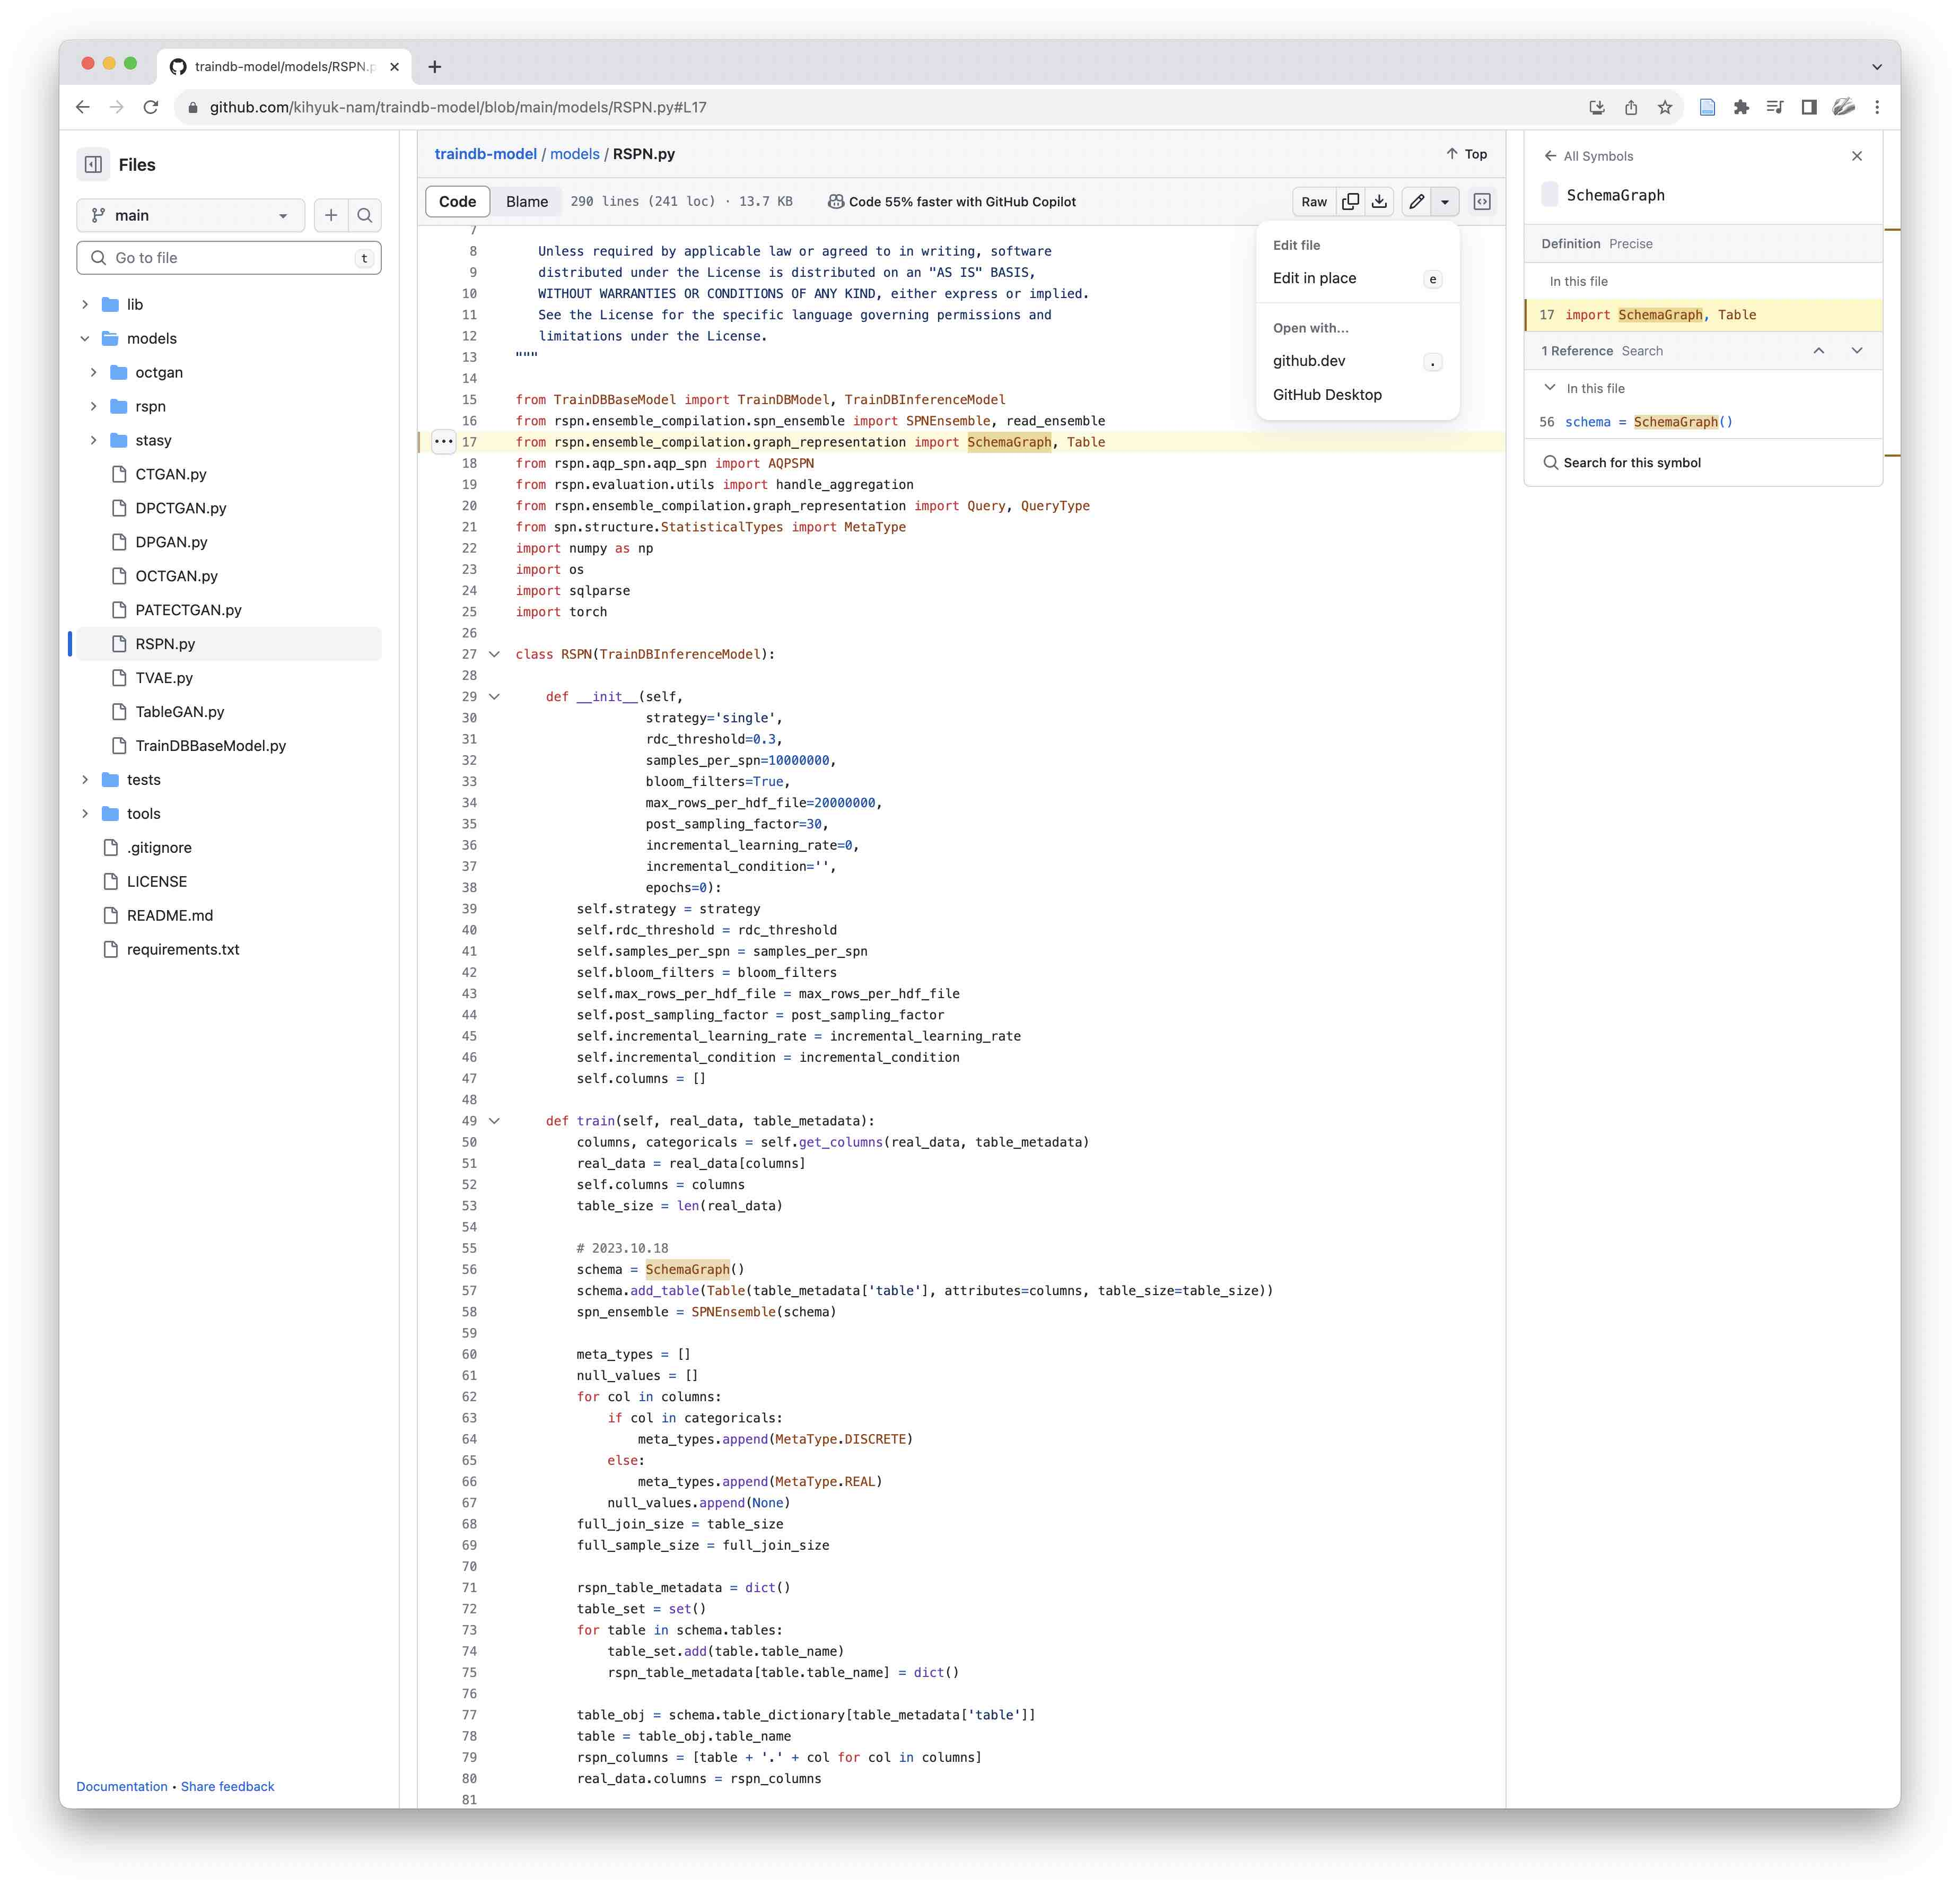
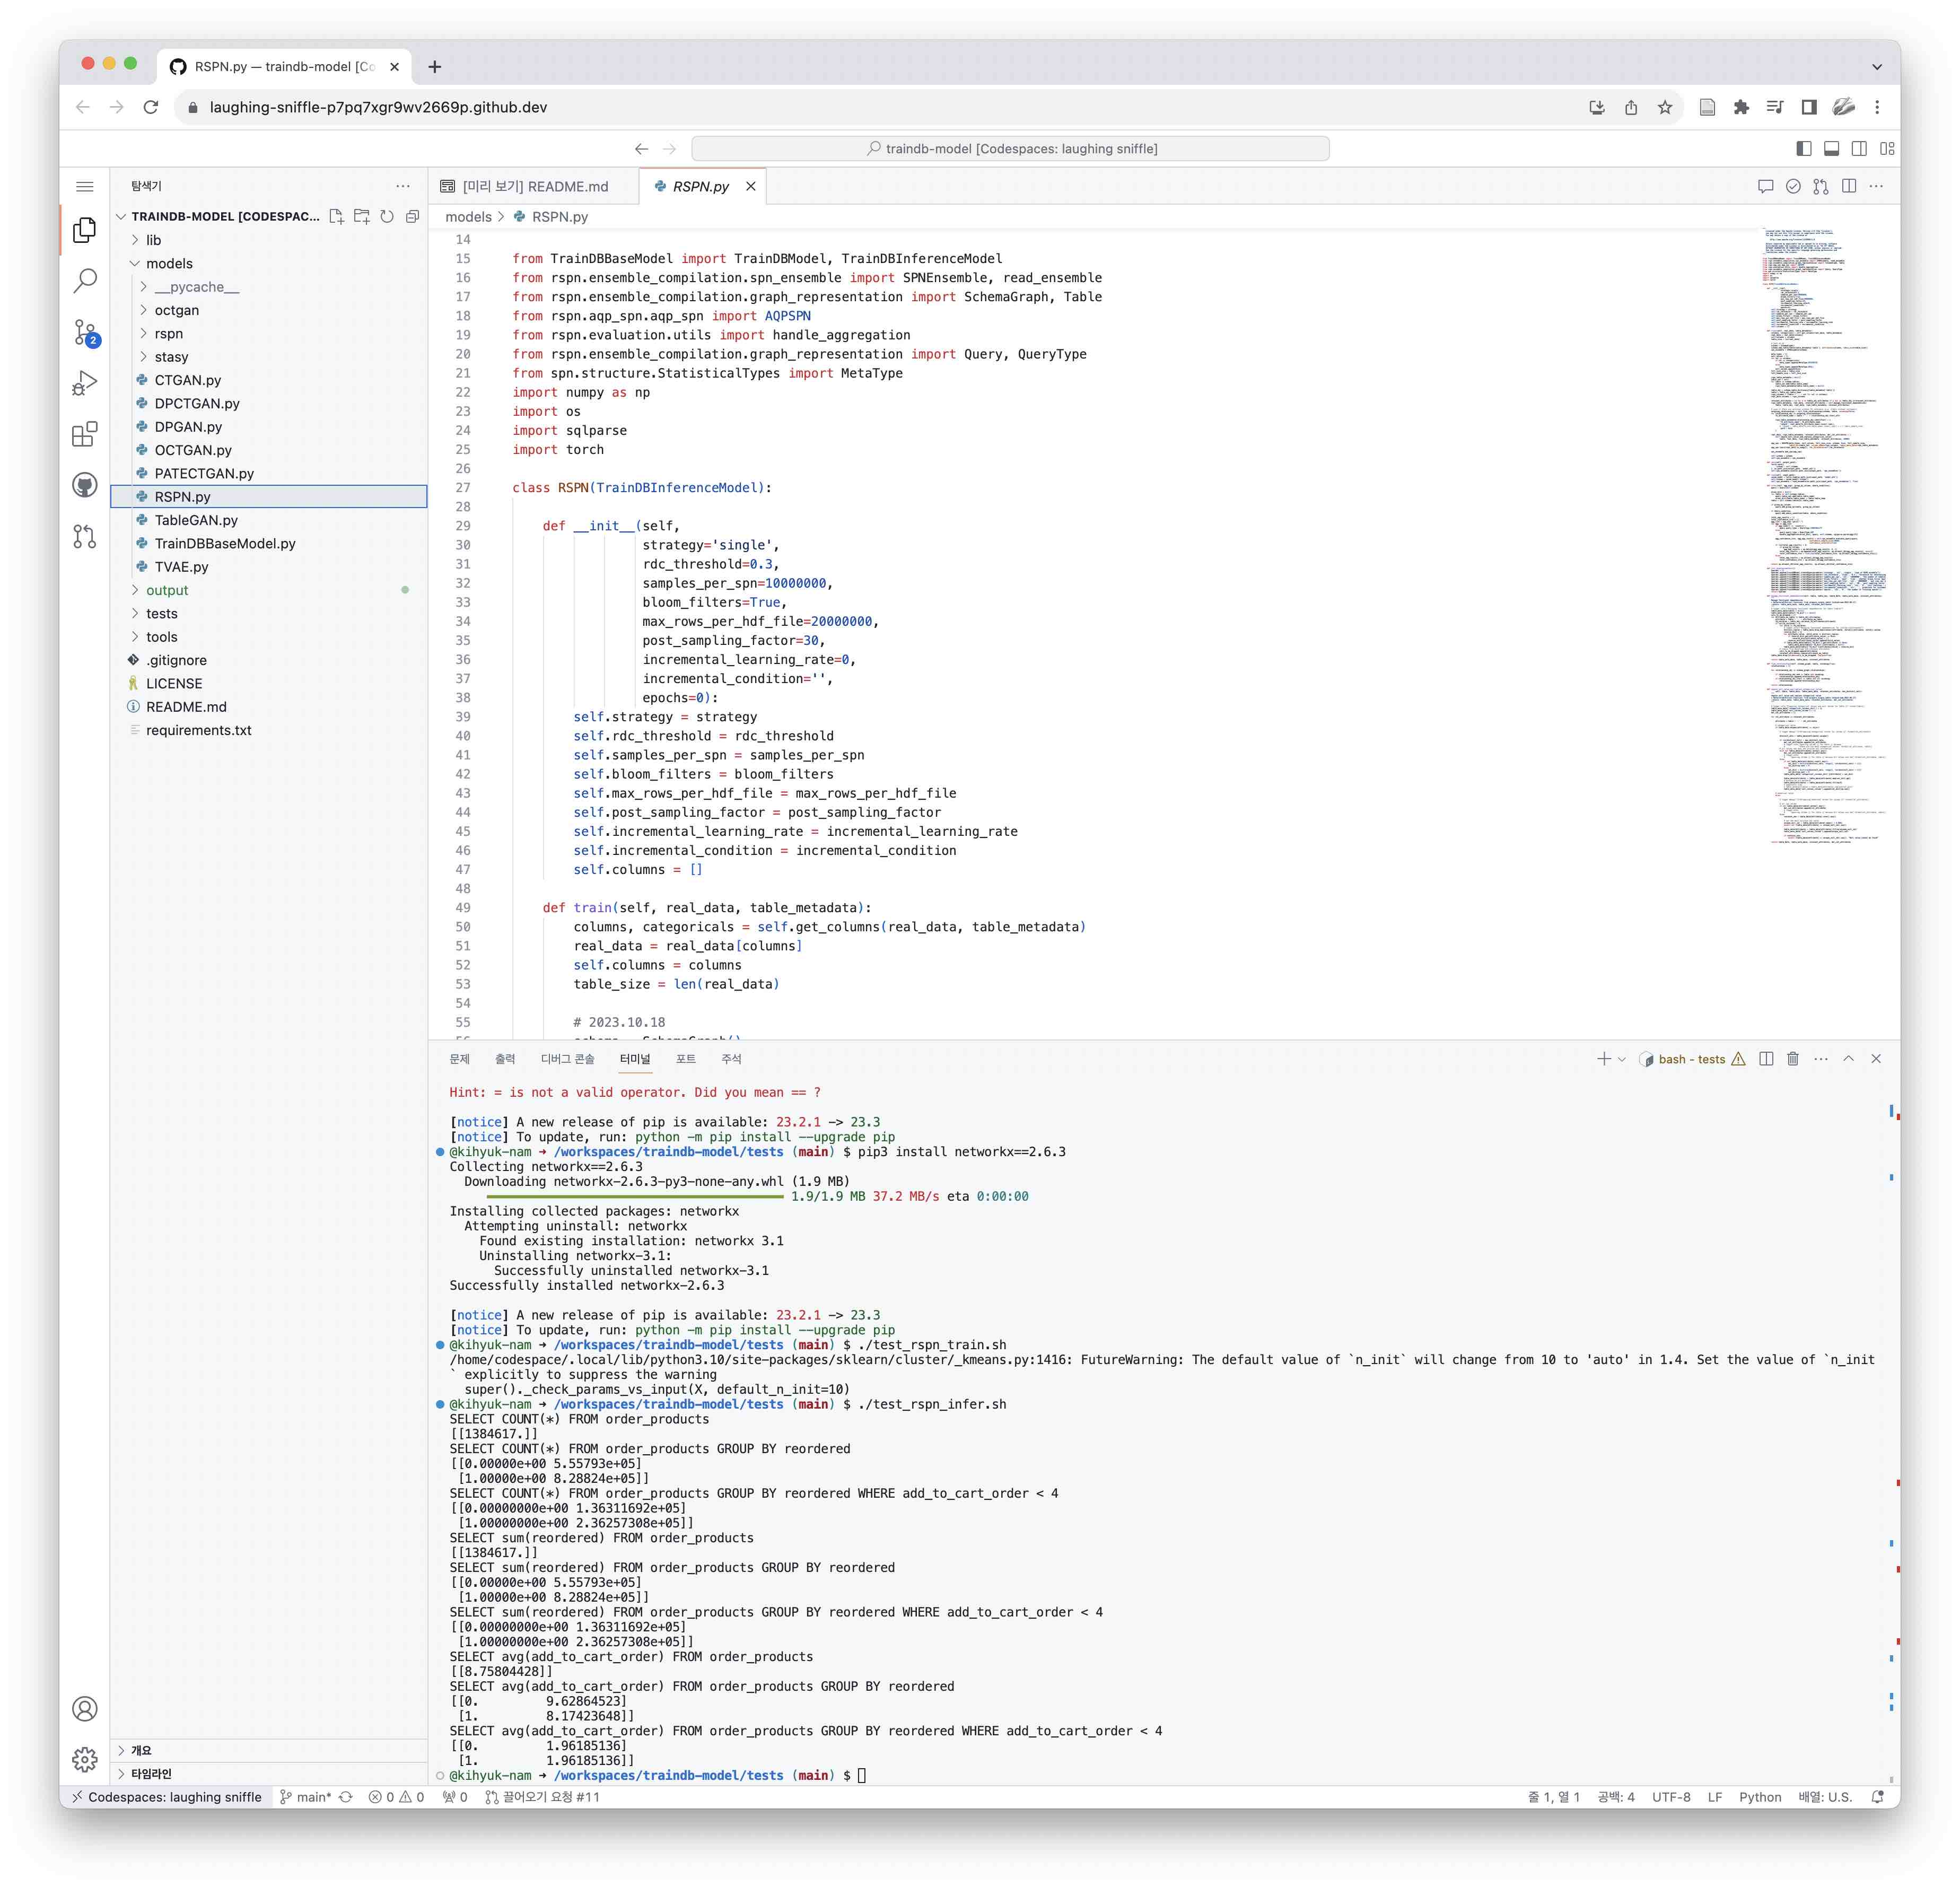